# Lab 8

### <span style="color:chocolate"> Submission requirements </span>

Additional points may be deducted if these requirements are not met:
    
* Comment your code
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own
* Be sure your submitted notebook includes the output of your run (Hint: go to Kernel -> Restart Kernel and Run All Cells...)
* Try and minimize the use of the global namespace (meaning, keep things inside functions)
* Upload your .ipynb file to Gradescope when done
---

This lab introduces you to K-means Clustering

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green, and blue.

There are plenty of RBG-to-color converters on the web 
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

For this assignment you are provided a file with RGB triples for a bunch of colors.

The task is to use K-means clustering to:

- group the colors into color families
- make a histogram of your color clusters to see the dsitribution of colors
- establish some human-readable names for your clusters like red, blue, yellow, etc.
- determine the centroids of the clusters
- write a function that makes the best guess of an RGB triple based on the centroids
- make some visual output to show that your guesses worked

In [1]:
## import necessary libraries and packages
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# importing sys
import sys

## Load Data

This color data was taken from a selection of digital ad images where the goal of the project was to understand if the presence of certain colors were indicative of high performing ads.

However, before making a predictive model, it was necessary to actually classify the color of RBG triples that were present in the images.

It is important to note that if the color values were uniformly distributed there would be no value in clustering.


In [2]:
data_file = "HW08_rgb_colors.csv"
df_colors = pandas.read_csv(data_file)

## Examine data

If our thesis is correct, similar colors should be near each other in the 3-dimensional RBG space.

To visualize this we can plot the RBG components and verify that this is the case.

Note that in the plot below, the full RGB triple is used to tell pandas/matplotlib what color to make each dot.

In [3]:
# how many data points?
len(df_colors)

2030

In [4]:
# what is in our DataFrame?
df_colors.head()

,red,green,blue
0,233,197,146
1,183,97,58
2,188,84,7
3,247,252,254
4,248,253,253


C:\Users\Dandan\AppData\Local\Temp/ipykernel_3364/1483985810.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


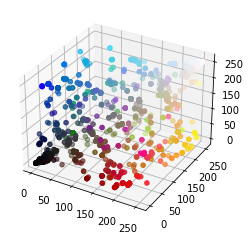

In [5]:
# make a 3d scatter plot
colors = np.array(df_colors.values)/256 # colors need to be (r,b,g) tuple in the range of 0-1

fig = plt.figure().gca(projection='3d')
fig.scatter(df_colors.red, df_colors.green, df_colors.blue, color=colors )

### Exercise 1: Construct K-means model (20 points)

Fit a KMeans model with 10 clusters.  Be sure to use a fixed `random_state` so that you get consistent results.

Use the `predict` function to get the cluster predictions for each data point and add this to the `df_colors` DataFrame 

##### Student Solution

In [6]:
n_clusters = 10
random_state = 10  # makes sure you get the same results each time

## get np array for RBG values
X = np.array(df_colors.values)
# Define the function to fit K-means model
def fit_kmeans(X, n_clusters, random_state):
    ## YOUR CODE HERE ## 
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(X)
    return model

# Fit the K-means model
model = fit_kmeans(X, n_clusters=n_clusters, random_state=random_state)

# Get cluster predictions and add them to the DataFrame
df_colors['cluster'] = model.predict(X)

# Print the DataFrame with cluster assignments
df_colors

c:\Users\Dandan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,red,green,blue,cluster
0,233,197,146,1
1,183,97,58,7
2,188,84,7,7
3,247,252,254,3
4,248,253,253,3
...,...,...,...,...
2025,27,123,141,9
2026,194,193,198,1
2027,41,113,197,4
2028,35,114,197,4


## Visualize results for K-means clustering


### Exercise 2: Plot a histogram of the distribution of clusters (20 points)

Since there are 10 clusters, using the `pandas.DataFrame.hist()` will render the correct distribution of values across each bin since 10 is the default number of bins.

Make sure that your visual output also matches the output of `Series.value_counts()`


##### Student Solution

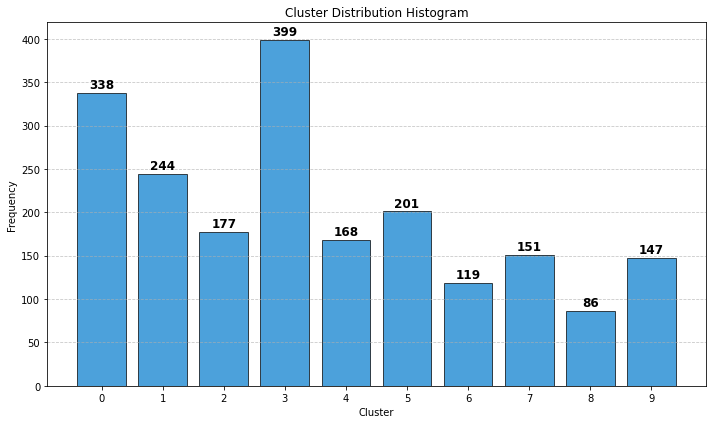

3    399
0    338
1    244
5    201
2    177
4    168
7    151
9    147
6    119
8     86
Name: cluster, dtype: int64


In [7]:
## plot histogram and print out number of points in each color cluster

## YOUR CODE HERE ## 
# Calculate cluster distribution and sort in descending order
cluster_distribution = df_colors['cluster'].value_counts().sort_values(ascending=False)

# Create a prettier histogram plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_distribution.index, cluster_distribution.values, color='#007acc', alpha=0.7, edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Cluster Distribution Histogram')
plt.xticks(range(n_clusters))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations with the cluster counts
for x, y in zip(cluster_distribution.index, cluster_distribution.values):
    plt.text(x, y + 2, str(y), ha='center', va='bottom', fontweight='bold', fontsize=12)

# Show the histogram
plt.tight_layout()
plt.show()

# Print the cluster distribution
print(cluster_distribution)

### Examine results of clustering

<AxesSubplot:xlabel='index', ylabel='cluster'>

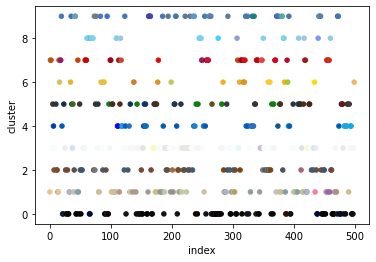

In [8]:
# take a look at distribution of colors - only the first 500 for clarity
df_colors[:500].reset_index(drop=False).plot(x='index', y='cluster', kind='scatter', color=colors[:500])

### Exercise 3: Determine the centroids of the clusters (20 points)


##### Student Solution

In [9]:
# get centroids

## YOUR CODE HERE ## 
centroids = model.cluster_centers_

# Print the centroids
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i + 1}: R={centroid[0]:.2f}, G={centroid[1]:.2f}, B={centroid[2]:.2f}")

Cluster Centroids:
Cluster 1: R=13.74, G=12.26, B=16.14
Cluster 2: R=184.59, G=176.51, B=159.07
Cluster 3: R=105.58, G=87.23, B=84.38
Cluster 4: R=244.11, G=246.62, B=246.13
Cluster 5: R=12.80, G=102.63, B=199.40
Cluster 6: R=47.97, G=65.42, B=46.38
Cluster 7: R=224.61, G=181.31, B=42.07
Cluster 8: R=192.66, G=29.59, B=38.80
Cluster 9: R=117.74, G=203.88, B=229.16
Cluster 10: R=71.11, G=128.82, B=168.41


Next, let's ``create a color dictionary`` to give color names to each centroid. You will need this dictionary to solve Exercise 4.

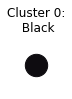

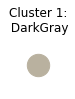

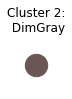

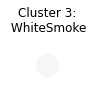

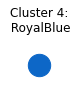

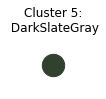

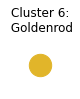

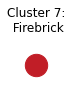

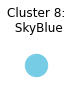

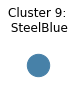

In [10]:
import HW08_color_names  #this is a dictionary
color_dict = HW08_color_names.get_closest_name_for_rgb(centroids)

def show_color(test_color, title):
  # normalize 
  c = [ cc/255 for cc in test_color]  

  # some random coordinates
  x=[1]
  y = [1]

  # plot a single dot
  fig = plt.figure(figsize=(1, 1))
  plt.scatter(x,y,color=c,s=500)
  plt.title(title)
  plt.axis('off')
  return(plt)

for cluster in range(n_clusters):
    show_color(centroids[cluster], f'Cluster {cluster}:\n {color_dict[cluster]}')


### Exercise 4: Write a function that makes the best guess of an RGB triple based on the centroids (20 points)

The  [`KMeans.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) function predicts the cluster of any test data point by returning the cluster whose center is closest to the test data point.

Without using `predict()` write a function that guesses the color of an RBG triple by finding the nearest centroid.

There are many ways to calculate distance.  For this exercise it is sufficient to use a simple Euclidean distance formula.


##### Student Solution

In [11]:
## color guessing function
def euclidean_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

def guess_color(centroids, color_dict, test_color):
    closest_centroid_index = None
    min_distance = float('inf')

    for i, centroid in enumerate(centroids):
        distance = euclidean_distance(test_color, centroid)
        if distance < min_distance:
            min_distance = distance
            closest_centroid_index = i

    # Find the color name corresponding to the closest centroid
    color_name = color_dict.get(closest_centroid_index, "Unknown")
    return color_name

# Create a dictionary that maps cluster number to cluster name
cluster_name_dict = {}
for cluster_number, cluster_name in enumerate(color_dict):
    cluster_name_dict[cluster_number] = cluster_name

color1 = [200, 5, 5]  # approximately red 
print(guess_color(centroids=centroids, color_dict=cluster_name_dict, test_color=color1))

Firebrick


### Exercise 5: Write a function that returns the colors name based on the `predict()` function (20 points)


##### Student Solution

In [12]:
def predict_color(model, color_dict, test_color):

    ## YOUR CODE HERE ## 
    # Predict the cluster for the test color
    cluster = model.predict([test_color])[0]

    # Find the color name corresponding to the predicted cluster
    color_name = cluster_name_dict.get(cluster, "Unknown")
    return color_name

# Test the predict_color function with a sample color
color1 = [200, 5, 5]  # approximately red
predicted_color = predict_color(model=model, color_dict=color_dict, test_color=color1)

print(predict_color(model=model, color_dict=color_dict, test_color=color1))

Firebrick
